In [2]:
import sys
import numpy as np
import itertools
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score

sys.path.append('../src/models/')
sys.path.append('../src/data/')
sys.path.append('../')
from data_loader import get_data
from predict_model import Predictor
import dynet as dy
from E2ELSTM2 import E2ELSTM
from DistLSTM import DistLSTM

In [3]:
import matplotlib.pyplot as plt

%matplotlib
%matplotlib inline  

Using matplotlib backend: Qt5Agg


In [4]:
def conf_mat(data, predictor):
    y_hat = predictor.predict_batch(data)
    y = [x.head_ind for x in data]

    y_hat_n = []
    y_n = []
    for x_hat, x in zip(y_hat, y):
        if x == x_hat:
            if x < 6:
                y_hat_n.append(x)
                y_n.append(x)
            else:
                y_hat_n.append(6)
                y_n.append(6)
        else:
            if x_hat < 6:
                y_hat_n.append(x_hat)
                if x < 6:
                    y_n.append(x)
                else:
                    y_n.append(6)
            else:
                y_hat_n.append(7)
                if x < 6:
                    y_n.append(x)
                else:
                    y_n.append(6)
    y_hat = y_hat_n
    y = y_n

    return confusion_matrix(y, y_hat), y, y_hat

In [5]:
train, dev, test = get_data()

using pretrained: True


In [6]:
labels = ['YEAR', 'AGE', 'CURRENCY', 'PEOPLE', 'TIME', 'OTHER', 'REFERENCE', 'REF-WRONG']

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')

#### E2E Model

In [7]:
model_path = '../logs/e2e_opt:adam_all/'

In [8]:
predictor = Predictor(model_path, E2ELSTM)
train_cnfm, y, y_hat = conf_mat(train, predictor)
dev_cnfm, y_dev, y_hat_dev = conf_mat(dev, predictor)

In [9]:
print accuracy_score(y, y_hat)
print accuracy_score(y_dev, y_hat_dev)

0.912166666667
0.529


In [26]:
print accuracy_score(y, y_hat)
print accuracy_score(y_dev, y_hat_dev)

0.7195
0.534


In [10]:
y_hat = np.array(y_hat)
y = np.array(y)

y_hat_dev = np.array(y_hat_dev)
y_dev = np.array(y_dev)

In [11]:
print 'groups detection train\t', float(((y < 6) == (y_hat < 6)).sum()) / len(y)
print 'groups detection dev\t', float(((y_dev < 6) == (y_hat_dev < 6)).sum()) / len(y_dev)

groups detection train	0.965833333333
groups detection dev	0.731


In [31]:
print 'groups detection train\t', float(((y < 6) == (y_hat < 6)).sum()) / len(y)
print 'groups detection dev\t', float(((y_dev < 6) == (y_hat_dev < 6)).sum()) / len(y_dev)

groups detection train	0.851833333333
groups detection dev	0.734


In [12]:
Counter(y_hat)

Counter({0: 270, 1: 796, 2: 303, 3: 427, 4: 93, 5: 1477, 6: 2553, 7: 81})

In [13]:
Counter(y_hat_dev)

Counter({0: 90, 1: 95, 2: 34, 3: 215, 4: 34, 5: 298, 6: 103, 7: 131})

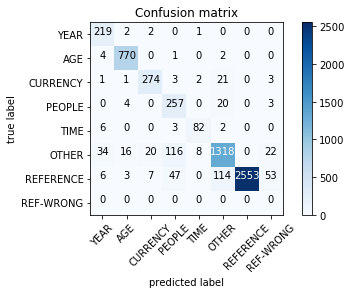

In [15]:
plot_confusion_matrix(train_cnfm, labels)

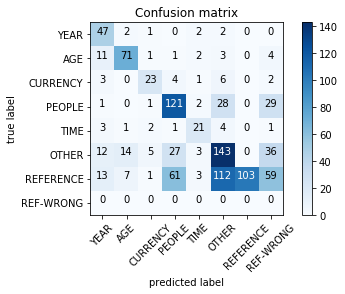

In [16]:
plot_confusion_matrix(dev_cnfm, labels)

#### Discriminate first

In [32]:
model_path = '../logs/dist_opt:mom_3/'
predictor = Predictor(model_path, DistLSTM)
train_cnfm, y, y_hat = conf_mat(train, predictor)
dev_cnfm, y_dev, y_hat_dev = conf_mat(dev, predictor)

In [33]:
print accuracy_score(y, y_hat)
print accuracy_score(y_dev, y_hat_dev)

0.898666666667
0.505


In [46]:
y_hat = np.array(y_hat)
y = np.array(y)

y_hat_dev = np.array(y_hat_dev)
y_dev = np.array(y_dev)

In [48]:
print 'groups detection train\t', float(((y < 6) == (y_hat < 6)).sum()) / len(y)
print 'groups detection dev\t', float(((y_dev < 6) == (y_hat_dev < 6)).sum()) / len(y_dev)

groups detection train	0.9635
groups detection dev	0.748


In [20]:
float(((y_dev < 6) == (y_hat_dev < 6)).sum()) / len(y_dev)

0.748

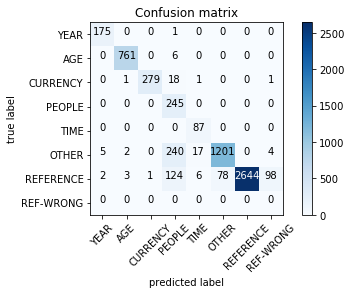

In [21]:
plot_confusion_matrix(train_cnfm, labels)

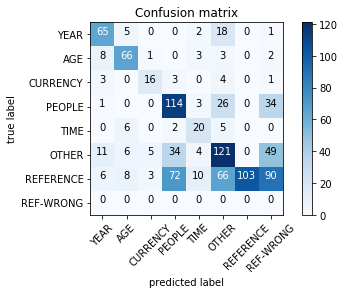

In [22]:
plot_confusion_matrix(dev_cnfm, labels)